In [1]:
# Importing the numpy library, which is used for working with arrays and mathematical functions
import numpy as np 

# Importing the pandas library, which is used for data manipulation and analysis. 
import pandas as pd 

# Setting a pandas option to display all columns of a DataFrame when it is displayed. 
# This is useful when you have a large number of columns in your DataFrame and you want to view all of them.
pd.set_option('display.max_columns', None)

# Importing seaborn and matplotlib libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Using pandas' read_csv function to read the CSV file located at the specified path. 
df = pd.read_csv("/kaggle/input/amplify-analytics-data-science-task/train_small.csv")

# Checking the shape of the DataFrame. This returns a tuple representing the dimensionality of the DataFrame. 
# The first element of the tuple will give the number of rows and the second element will give the number of columns.
df.shape

(2168020, 54)

In [3]:
# Viewing the first 5 rows of the dataset
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21.0,295.0,0.0,12588.0,2.0,46.0,1.0,0.0,1.0,1.0,NaN,238.35,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36.0,299.0,0.0,12588.0,2.0,46.0,1.0,0.0,1.0,1.0,NaN,238.34,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22.0,373.0,1.0,12588.0,2.0,46.0,1.0,0.0,1.0,1.0,NaN,238.33,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4.0,329.0,0.0,12588.0,2.0,46.0,1.0,0.0,1.0,1.0,NaN,238.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26.0,600.0,0.0,12588.0,2.0,46.0,1.0,0.0,1.0,1.0,NaN,238.35,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


## 1.	Load the dataset into R or Python and identify the type of the dataset features and report them.


**The dataset consists of the following types of features:**

| Type of Variable | Variable Name |
|-----------------|---------------|
| Categorical     | search_id, site_id, user_country_id, listing_country_id, listing_id, destination_id, competitor1_rate, competitor1_has_availability, competitor2_rate, competitor2_has_availability, competitor3_rate, competitor3_has_availability, competitor4_rate, competitor4_has_availability, competitor5_rate, competitor5_has_availability, competitor6_rate, competitor6_has_availability, competitor7_rate, competitor7_has_availability, competitor8_rate, competitor8_has_availability |
| Numeric         | user_hist_stars, user_hist_paid, listing_review_score, location_score1, location_score2, log_historical_price, listing_position, price_usd, length_of_stay, booking_window, num_adults, num_kids, num_rooms, log_click_proportion, distance_to_dest, competitor1_price_percent_diff, competitor2_price_percent_diff, competitor3_price_percent_diff, competitor4_price_percent_diff, competitor5_price_percent_diff, competitor6_price_percent_diff, competitor7_price_percent_diff, competitor8_price_percent_diff, booking_value |
| Binary          | is_brand, has_promotion, stay_on_saturday, random_sort, clicked, booked |



We would be dropping **search_id** as it is unique to search, and new searches will have new search ids, hence not useful to us.

**listing_position** as this would not be available in test data, hence it is not of use to us.


## 2. Perform summary statistics and explain what issues these statistics reveal?

**Based on the statistics, potential issues can be identified:**

**1. Outliers:** Large differences between maximum and minimum values, such as "listing_position" (1 to 40) and "price_usd" (varying significantly), indicate the presence of outliers. These extreme values could impact analysis or modeling.

**2. Skewed Distributions:** Skewness is observed in variables like "log_click_proportion" (mean: 1.11, median: 1.00), suggesting a positively skewed distribution. A small percentage of listings may receive disproportionately high click proportions.

**3. High Variability:** Variables with large standard deviations, e.g., "user_hist_paid" and "price_usd," indicate high data variability. This implies a wide range of payment amounts and listing prices. For instance, high variability in "price_usd" can be attributed to differences in the displayed hotel prices based on country conventions regarding taxes, fees, and per-night or per-stay pricing. Outliers in these cases may indicate data entry errors or extreme values impacting analysis or modeling.

**4. Data Sparsity:** Sparse columns like "competitor1_price_percent_diff" and "competitor2_price_percent_diff" have a low count compared to the total records. Limited data availability for these variables may pose challenges for analysis. For example, only a small subset of listings may have information on the price difference with competitor 1.

In [4]:
# Checking for null (missing) values in the DataFrame. 
# The isnull() function returns a DataFrame of True/False values, and sum() then counts the number of True values (i.e., nulls) in each column.
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2056136
user_hist_paid                    2055479
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3193
is_brand                                0
location_score1                         0
location_score2                    479316
log_historical_price                    1
listing_position                        1
price_usd                               1
has_promotion                           1
destination_id                          1
length_of_stay                          1
booking_window                          1
num_adults                              1
num_kids                                1
num_rooms                               1
stay_on_saturday                  

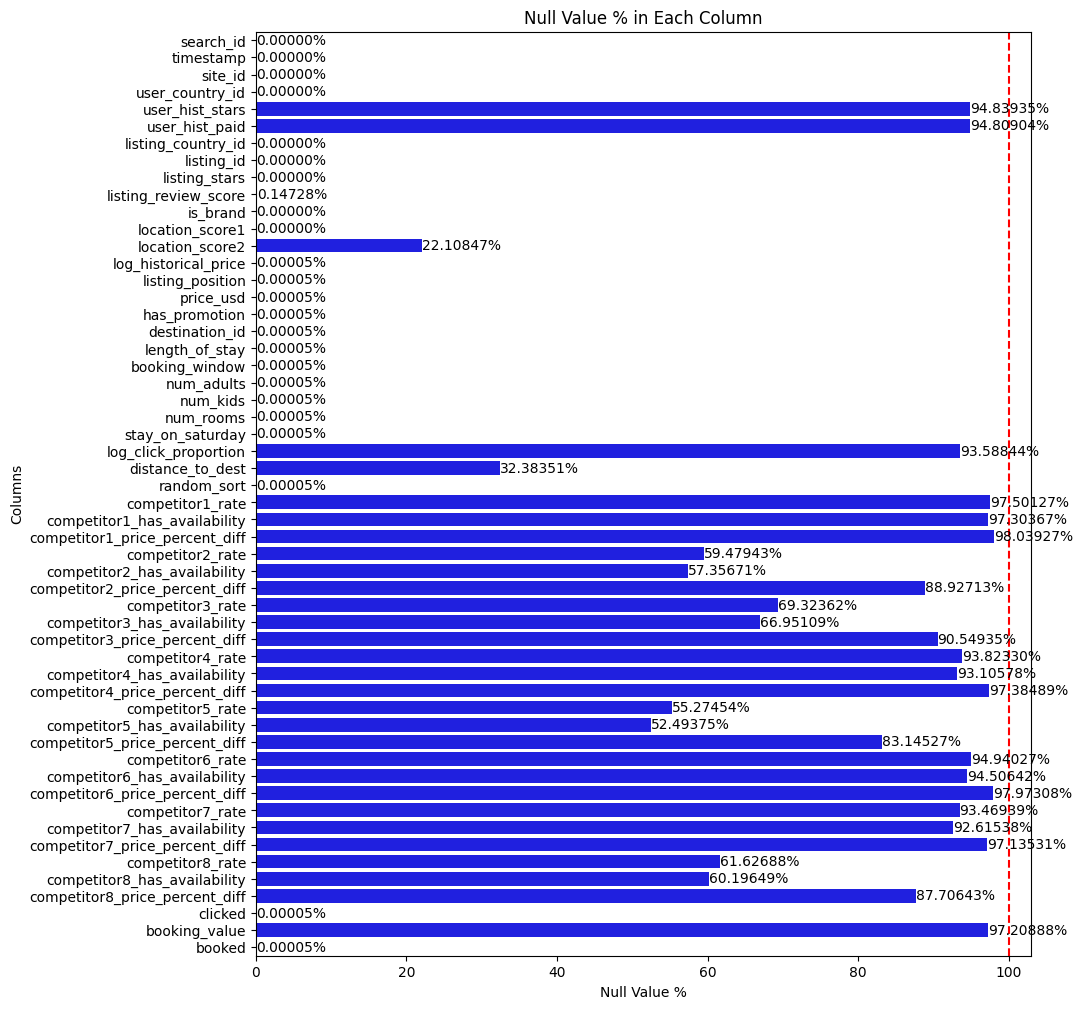

In [5]:
# Calculate the percentage of null values in each column
null_percent = df.isnull().mean() * 100

# Create a DataFrame from the null_percent Series for easier plotting
df_null_percent = pd.DataFrame({'column': null_percent.index, 'null_percent': null_percent.values})

# Create a bar plot
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='null_percent', y='column', data=df_null_percent, color='blue')

# Add a line at 100%
plt.axvline(100, color='red', linestyle='--')

# Add data labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width,  # x position of text
             p.get_y() + p.get_height() / 2,  # y position of text
             '{:1.5f}%'.format(width),  # text (percentage of null values)
             ha = 'left',  # horizontal alignment of text
             va = 'center')  # vertical alignment of text

plt.xlabel('Null Value %')
plt.ylabel('Columns')
plt.title('Null Value % in Each Column')
plt.show()

In [6]:
# Dropping rows with null values in the 'booked' column. 
# This is done because the target variable ('booked') should not have any missing values for the model to make accurate predictions.
df.dropna(subset=['booked'], inplace=True)

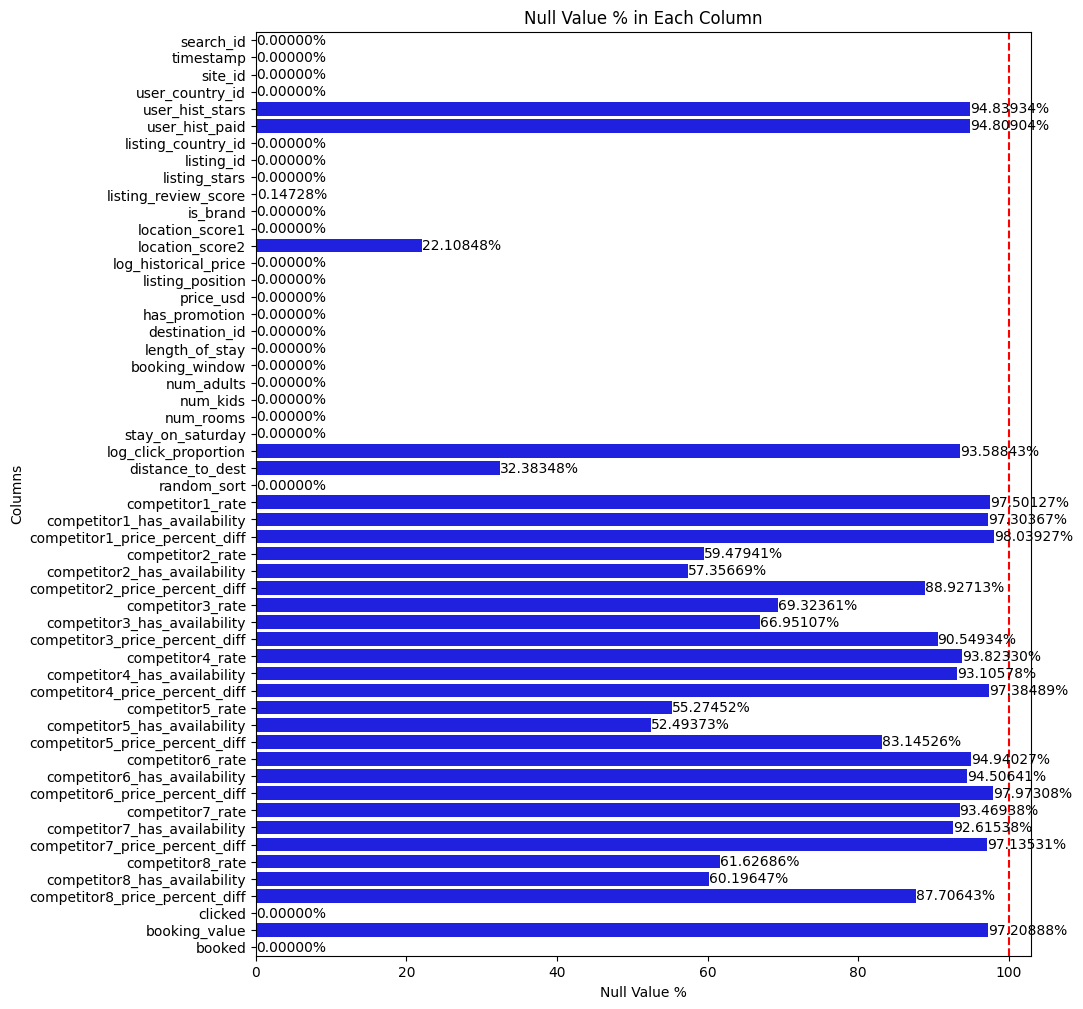

In [7]:
# Calculate the percentage of null values in each column
null_percent = df.isnull().mean() * 100

# Create a DataFrame from the null_percent Series for easier plotting
df_null_percent = pd.DataFrame({'column': null_percent.index, 'null_percent': null_percent.values})

# Create a bar plot
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='null_percent', y='column', data=df_null_percent, color='blue')

# Add a line at 100%
plt.axvline(100, color='red', linestyle='--')

# Add data labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width,  # x position of text
             p.get_y() + p.get_height() / 2,  # y position of text
             '{:1.5f}%'.format(width),  # text (percentage of null values)
             ha = 'left',  # horizontal alignment of text
             va = 'center')  # vertical alignment of text

plt.xlabel('Null Value %')
plt.ylabel('Columns')
plt.title('Null Value % in Each Column')
plt.show()

**Dropping null values in booked also removed null values from clicked, which is also a choice for target variable**

In [8]:
# Checking for unique values in each column of the DataFrame. 
# This is useful to understand the diversity of values in each column.
df.nunique()

search_id                          87337
timestamp                          87129
site_id                               34
user_country_id                      191
user_hist_stars                      287
user_hist_paid                      4020
listing_country_id                   165
listing_id                        115583
listing_stars                          6
listing_review_score                  10
is_brand                               2
location_score1                      337
location_score2                     9045
log_historical_price                 379
listing_position                      40
price_usd                          61001
has_promotion                          2
destination_id                     12612
length_of_stay                        32
booking_window                       387
num_adults                             9
num_kids                              10
num_rooms                              8
stay_on_saturday                       2
log_click_propor

In [9]:
# Dropping the 'search_id' and 'listing_position' columns from the DataFrame.
# 'search_id' is being dropped because it is unique to each search. In a new search scenario, 
# there will be a new 'search_id', so this column is not useful for predictive modeling.
# 'listing_position' is being dropped because it will not be available in the test data. 
# Therefore, it cannot be used to train the model as it would not be possible to use it for predictions on new data.

df.drop(['search_id','listing_position'], axis =1, inplace = True)

In [10]:
# # Importing the ProfileReport function from the ydata_profiling library
# from ydata_profiling import ProfileReport

# # Creating a ProfileReport for the DataFrame
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [11]:
# # Displaying the ProfileReport as html
# profile.to_file("profile_report.html")

In [12]:
# Define a dictionary mapping column names to their new data types
new_data_types = \
{'timestamp':'datetime64[ns]',
'site_id':'category',
'user_country_id':'category',
'user_hist_stars':'float64',
'user_hist_paid':'float64',
'listing_country_id':'category',
'listing_id':'category',
'listing_stars':'int8',
'listing_review_score':'float64',
'is_brand':'int8',
'location_score1':'float64',
'location_score2':'float64',
'log_historical_price':'float64',
'price_usd':'float64',
'has_promotion':'int8',
'destination_id':'category',
'length_of_stay':'int32',
'booking_window':'int32',
'num_adults':'int8',
'num_kids':'int8',
'num_rooms':'int8',
'stay_on_saturday':'int8',
'log_click_proportion':'float64',
'distance_to_dest':'float64',
'random_sort':'int8',
'competitor1_rate':'category',
'competitor1_has_availability':'category',
'competitor1_price_percent_diff':'float64',
'competitor2_rate':'category',
'competitor2_has_availability':'category',
'competitor2_price_percent_diff':'float64',
'competitor3_rate':'category',
'competitor3_has_availability':'category',
'competitor3_price_percent_diff':'float64',
'competitor4_rate':'category',
'competitor4_has_availability':'category',
'competitor4_price_percent_diff':'float64',
'competitor5_rate':'category',
'competitor5_has_availability':'category',
'competitor5_price_percent_diff':'float64',
'competitor6_rate':'category',
'competitor6_has_availability':'category',
'competitor6_price_percent_diff':'float64',
'competitor7_rate':'category',
'competitor7_has_availability':'category',
'competitor7_price_percent_diff':'float64',
'competitor8_rate':'category',
'competitor8_has_availability':'category',
'competitor8_price_percent_diff':'float64',
'clicked':'int8',
'booking_value':'float64',
'booked':'int8'
}

# Change data types of columns based on the 'new_data_types' dictionary
df = df.astype(new_data_types)

In [13]:
# Displaying summary statistics of the DataFrame. 
# This includes count, mean, std, min, 25%, 50%, 75%, max for numerical columns. Values are rounded to 1 decimal places for readability.
df.describe().round(1)

,user_hist_stars,user_hist_paid,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,price_usd,has_promotion,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_price_percent_diff,competitor2_price_percent_diff,competitor3_price_percent_diff,competitor4_price_percent_diff,competitor5_price_percent_diff,competitor6_price_percent_diff,competitor7_price_percent_diff,competitor8_price_percent_diff,clicked,booking_value,booked
count,111884.0,112541.0,2168019.0,2164826.0,2168019.0,2168019.0,1688703.0,2168019.0,2168019.0,2168019.0,2168019.0,2168019.0,2168019.0,2168019.0,2168019.0,2168019.0,139004.0,1465939.0,2168019.0,42509.0,240062.0,204892.0,56696.0,365414.0,43944.0,62107.0,266527.0,2168019.0,60512.0,2168019.0
mean,3.4,178.5,3.2,3.8,0.6,2.9,0.1,4.3,296.9,0.2,2.4,37.7,2.0,0.3,1.1,0.5,-24.4,1313.7,0.3,242.5,24.0,26.8,169.4,30.1,17.1,20.1,21.6,0.0,384.1,0.0
std,0.7,107.6,1.1,1.0,0.5,1.5,0.2,1.8,23873.5,0.4,2.1,52.1,0.9,0.7,0.4,0.5,16.2,2026.1,0.5,1145.4,2939.8,960.0,6143.8,1539.3,29.7,64.2,783.1,0.2,530.3,0.2
min,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-326.6,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
25%,3.0,111.1,3.0,3.5,0.0,1.8,0.0,4.4,85.0,0.0,1.0,4.0,2.0,0.0,1.0,0.0,-31.3,142.5,0.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,0.0,124.0,0.0
50%,3.4,152.7,3.0,4.0,1.0,2.8,0.1,4.9,122.1,0.0,2.0,17.0,2.0,0.0,1.0,0.0,-20.5,392.1,0.0,10.0,11.0,11.0,11.0,12.0,11.0,12.0,11.0,0.0,218.8,0.0
75%,4.0,216.8,4.0,4.5,1.0,4.1,0.2,5.3,185.1,0.0,3.0,49.0,2.0,0.0,1.0,1.0,-13.5,1525.4,1.0,16.0,20.0,18.0,19.0,20.0,18.0,20.0,17.0,0.0,432.4,0.0
max,5.0,1445.2,5.0,5.0,1.0,7.0,1.0,6.2,19726328.0,1.0,57.0,498.0,9.0,9.0,8.0,1.0,-3.1,11637.8,1.0,13867.0,1439917.0,140907.0,1001584.0,607561.0,1363.0,7951.0,130000.0,1.0,20238.7,1.0


In [14]:
# Selecting the numeric columns from the DataFrame, excluding the 'booked' column
numeric_columns = df.select_dtypes(include=['int8', 'float64']).columns.drop('booked').tolist()

# Grouping the DataFrame by the 'booked' column and calculating the mean and median of the numeric columns
grouped_stats = df.groupby('booked')[numeric_columns].agg(['mean', 'median'])

# Printing the grouped statistics, rounded to 2 decimal places
grouped_stats.round(2)

user_hist_stars        user_hist_paid         listing_stars         \
                  mean median           mean  median          mean median   
booked                                                                      
0                 3.38   3.45         178.51  152.76          3.18    3.0   
1                 3.38   3.44         178.99  152.45          3.32    3.0   

       listing_review_score        is_brand        location_score1         \
                       mean median     mean median            mean median   
booked                                                                      
0                      3.77    4.0     0.63    1.0            2.88   2.77   
1                      3.94    4.0     0.66    1.0            2.84   2.71   

       location_score2        log_historical_price        price_usd         \
                  mean median                 mean median      mean median   
booked                                                                       
0                 0.13   0.07                 4.31   4.91    296.77  123.0   
1                 0.19   0.13                 4.31   4.93    300.88  113.0   

       has_promotion        num_adults        num_kids        num_rooms  \
                mean median       mean median     mean median      mean   
booked                                                                    
0               0.21    0.0       1.97    2.0     0.35    0.0      1.11   
1               0.30    0.0       1.94    2.0     0.37    0.0      1.13   

              stay_on_saturday        log_click_proportion         \
       median             mean median                 mean median   
booked                                                              
0         1.0             0.50    0.0               -24.49 -20.54   
1         1.0             0.51    1.0               -22.13 -17.99   

       distance_to_dest         random_sort         \
                   mean  median        mean median   
booked                                               
0               1314.92  392.97        0.30    0.0   
1               1270.80  360.60        0.06    0.0   

       competitor1_price_percent_diff        competitor2_price_percent_diff  \
                                 mean median                           mean   
booked                                                                        
0                              241.44   10.0                          24.18   
1                              280.79   10.0                          19.70   

              competitor3_price_percent_diff         \
       median                           mean median   
booked                                                
0        11.0                          27.03   11.0   
1        12.0                          19.16   12.0   

       competitor4_price_percent_diff        competitor5_price_percent_diff  \
                                 mean median                           mean   
booked                                                                        
0                              166.53   11.0                          30.45   
1                              266.97   11.0                          19.53   

              competitor6_price_percent_diff         \
       median                           mean median   
booked                                                
0        12.0                          17.16   11.0   
1        13.0                          16.80   11.0   

       competitor7_price_percent_diff        competitor8_price_percent_diff  \
                                 mean median                           mean   
booked                                                                        
0                               20.03   12.0                          21.73   
1                               20.67   12.0                          16.55   

              clicked        booking_value          
       median    mean median          mean  median  
booke

## 3.	Perform exploratory analysis to identify any collinearities and explain which issues collinearity causes.

The correlation heatmap indicates no significant correlation among the numeric variables, indicating the absence of collinearity. Nonetheless, collinearity can impact classification models by introducing dependence among predictors and increasing the standard errors of parameter estimates. Non-linear models such as random forest and decision trees tend to handle collinearity better than logistic regression. However, it's important to note that collinearity can still affect feature importance and the interpretability of the model.

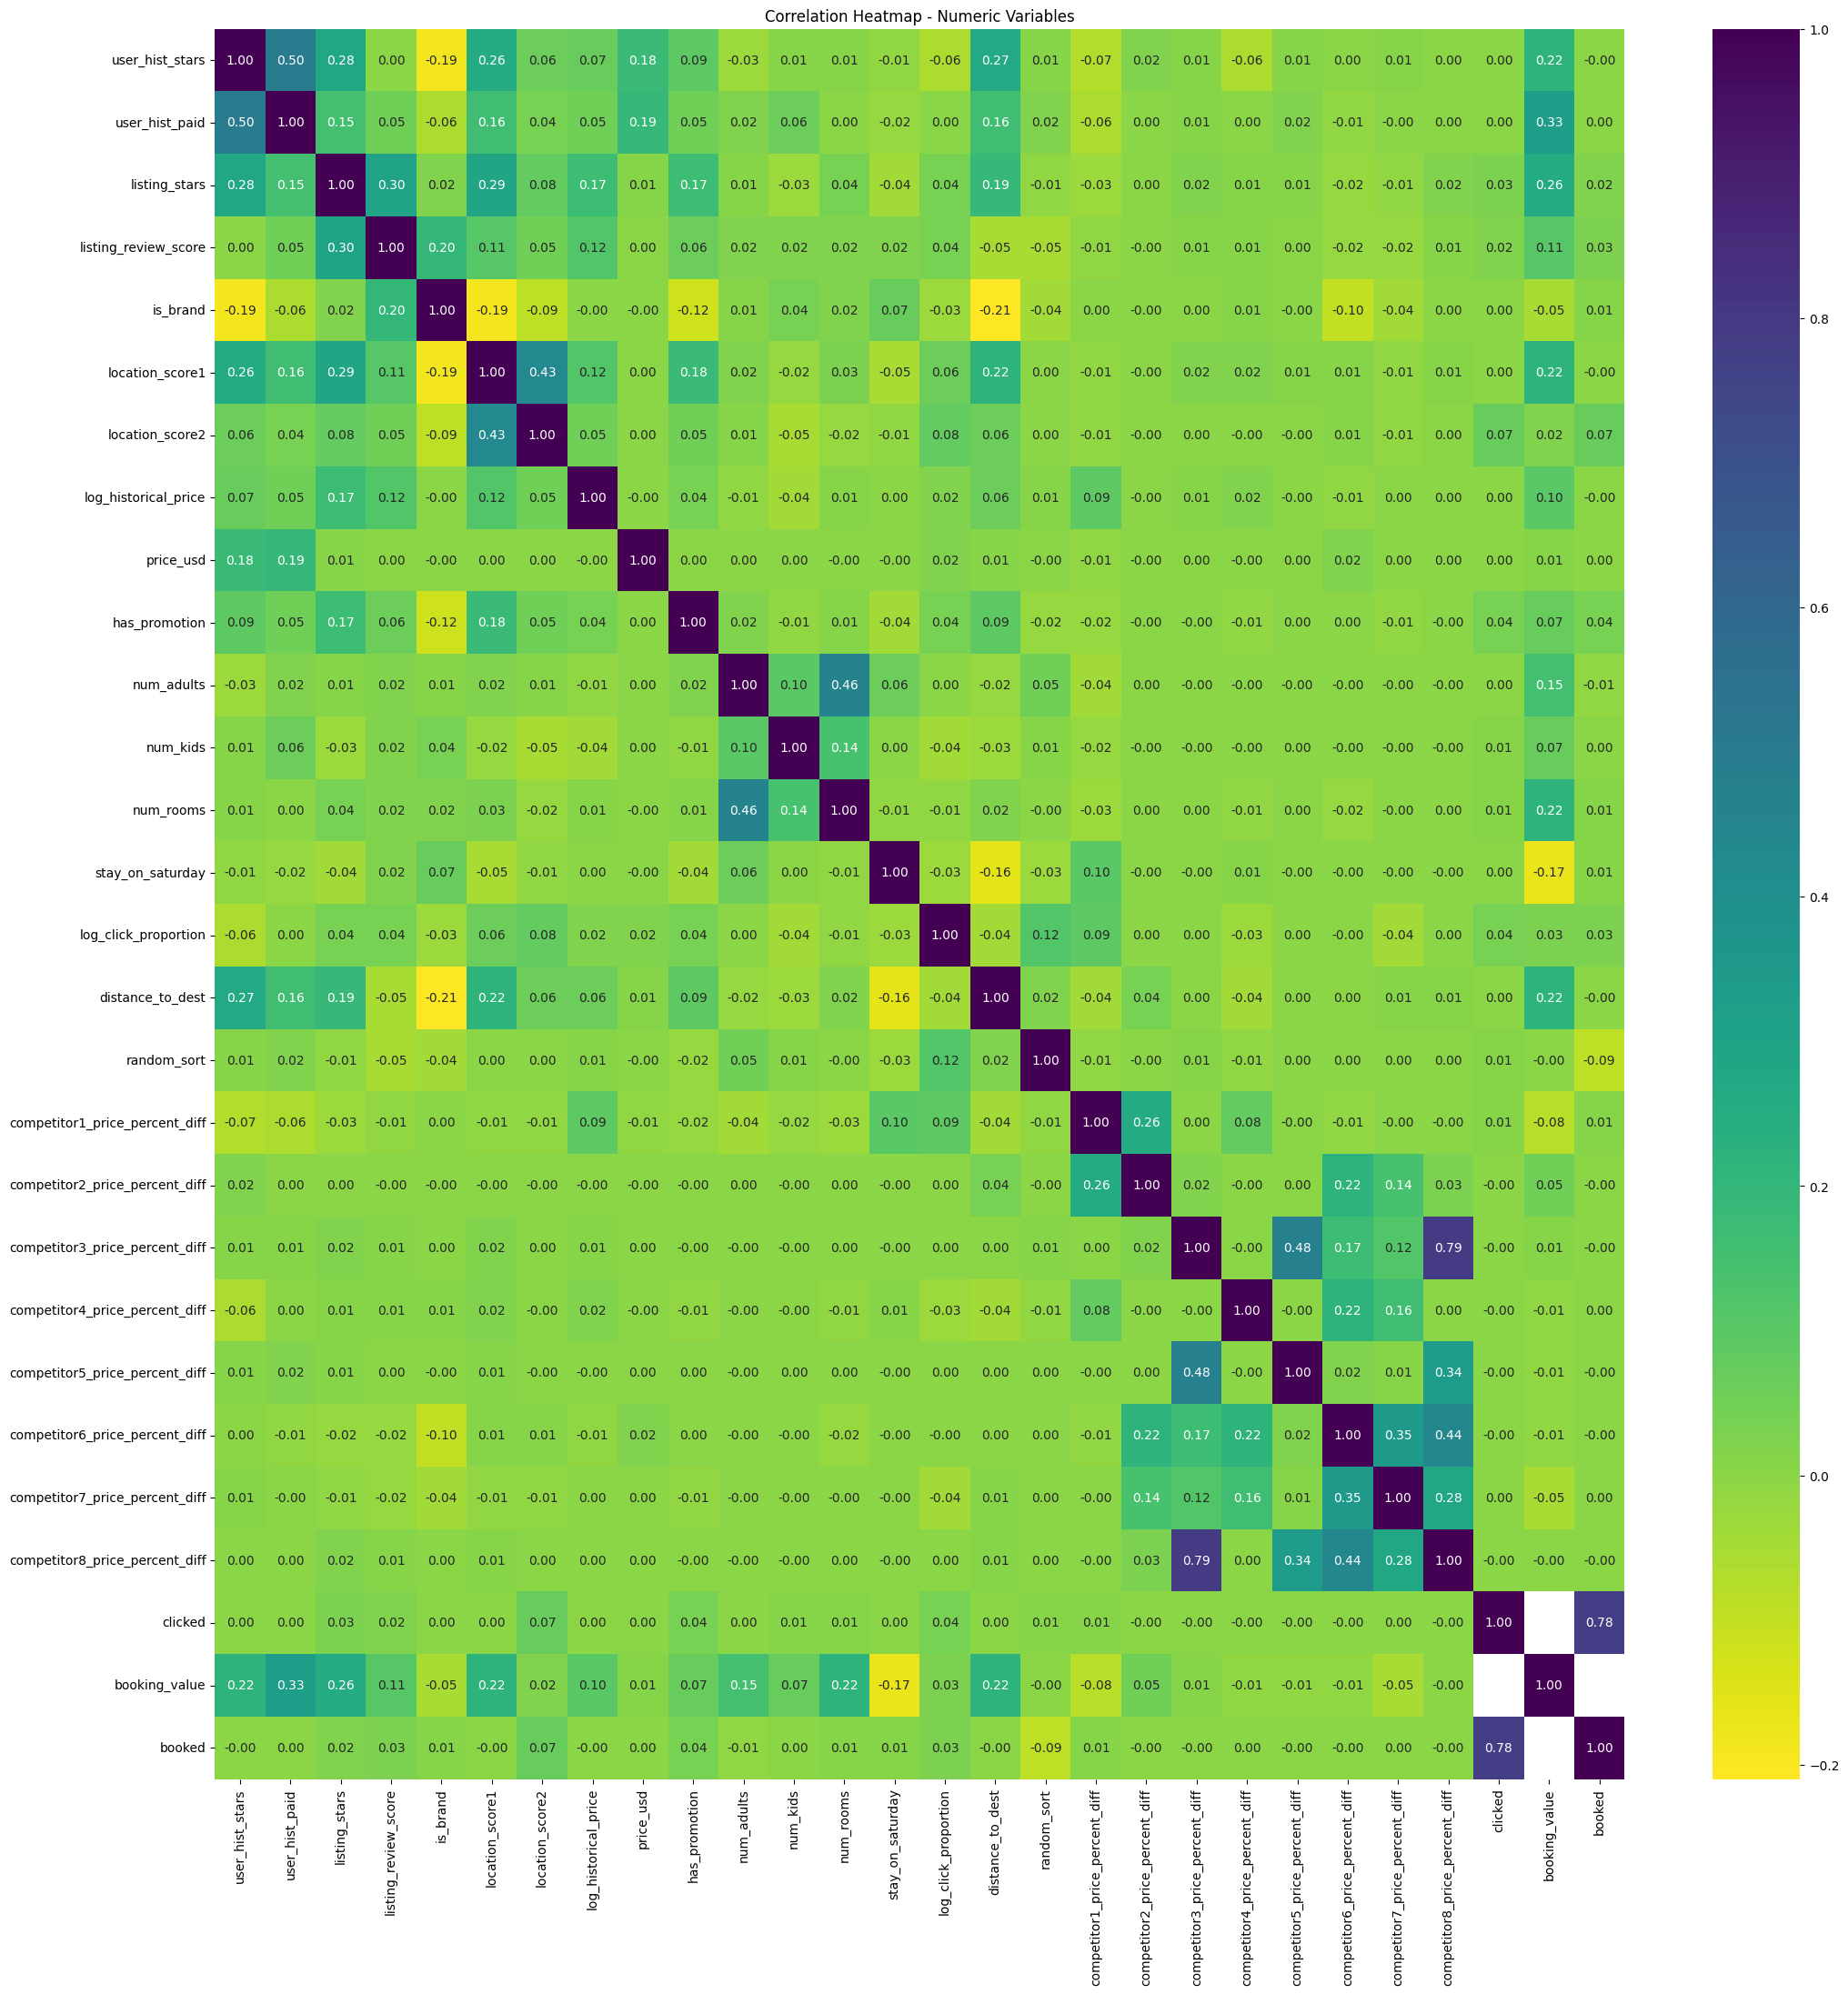

In [15]:
# Calculating the correlation matrix for the numeric columns
correlation_matrix = df.select_dtypes(include=['int8', 'float64']).corr().round(2)

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis_r')
plt.title('Correlation Heatmap - Numeric Variables')
plt.show()

## 4.	There is currently a problem in the data which will lead to inflation in the success of the metric of choice (i.e., inflated accuracy, or false reduction in loss). This will keep the model from generalizing to the test set. Please identify what it is and explain the problem?

The dataset has class imbalance: "booked" (97.21% class 0, 2.79% class 1) and "clicked" (95.54% class 0, 4.46% class 1). This imbalance can lead to high accuracy or low loss by predicting the majority class, without effectively predicting the minority class, which may result in poor generalization to unseen data. Strategies like resampling, synthetic data, or specific metrics (e.g., precision, recall, F1-score) can improve minority class prediction.

In [16]:
# Calculate the number and percentage of values in the 'booked' column
booked_counts = df['booked'].value_counts()
booked_percentages = df['booked'].value_counts(normalize=True) * 100

# Create the crosstab
crosstab_df = pd.crosstab(index=booked_counts.index, columns=["Number", "Percentage"])
crosstab_df["Number"] = booked_counts
crosstab_df["Percentage"] = booked_percentages.round(2)

# Display the crosstab
print(crosstab_df)

col_0   Number  Percentage
row_0                     
0      2107507       97.21
1        60512        2.79


In [17]:
# Calculate the number and percentage of values in the 'clicked' column
booked_counts = df['clicked'].value_counts()
booked_percentages = df['clicked'].value_counts(normalize=True) * 100

# Create the crosstab
crosstab_df = pd.crosstab(index=booked_counts.index, columns=["Number", "Percentage"])
crosstab_df["Number"] = booked_counts
crosstab_df["Percentage"] = booked_percentages.round(2)

# Display the crosstab
print(crosstab_df)

col_0   Number  Percentage
row_0                     
0      2071367       95.54
1        96652        4.46


## 5.	Propose and implement the solutions for the issues you have found. The issues listed here are not exhaustive. If you encounter any other issues, please propose and implement solutions for those as well.

To address the identified issues, here are proposed solutions and their implementations:

**1. Class imbalance for target variables:**
Solution: Class imbalance can be addressed by applying resampling techniques or using appropriate evaluation metrics for imbalanced datasets.
Implementation: Methods such as oversampling (e.g., SMOTE) or under sampling (e.g., random under sampling) to balance the classes cab be employed. Additionally, we can adjust classification thresholds or use evaluation metrics like precision, recall, or F1 score that are robust to class imbalance.

**2. Sparse columns:**
Solution: We need to evaluate the relevance and usefulness of sparse columns. If deemed valuable, we can consider techniques like data imputation or feature engineering to handle missing values or use models that are robust to missing values.
Implementation: Depending on their significance and percentage of missing data, we can apply imputation techniques (e.g., mean imputation or model-based imputation) to fill in missing values or derive new features based on the available data.

**3. Handling high data variability:**
Solution: We need to normalize or scale variables with high variability to ensure consistent comparisons and prevent dominance by certain features.
Implementation: We can apply normalization techniques such as z-score normalization or min-max scaling to bring variables within a similar range. This ensures that variables with larger values do not disproportionately impact the analysis or modelling process.

## 1.	Calculate Click-Through Rates and Conversion Rates.

**Source:** [What Is Click-Through Rate (CTR), How To Calculate It (Formula) and How Does It Compare to Conversion Rate](https://vwo.com/blog/conversion-rate-and-click-through-rate-difference/)

Clickthrough rate (CTR) is the percentage of users who click on a link or advertisement out of the total number of impressions.\
**CTR = (Total Clicks / Total Impressions) * 100**\
In our case CTR = 4.46%


Conversion rate is the percentage of successful outcomes (bookings, purchases, etc.) out of the total number of interactions or clicks.\
**Conversion Rate = (Total Bookings / Total Clicks) * 100**\
In our case CTR = 62.61%

In [18]:
total_clicks = df['clicked'].sum()
total_impressions = len(df)
clickthrough_rate = (total_clicks / total_impressions) * 100
print(f"Clickthrough Rate: {clickthrough_rate:.2f}%")

Clickthrough Rate: 4.46%


In [19]:
total_bookings = df['booked'].sum()
conversion_rate = (total_bookings / total_clicks) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 62.61%


## 2. How do property review score and property star rating affect click-through and conversion rates? Employ statistical techniques to formally compare the effects of different levels of these variables.


**Analysing for property review score for conversion rates**
To formally compare the effects of property review score and property star rating on click-through and conversion rates, we can use statistical techniques such as the chi-square test. The analysis assumes equal conversion rates. We formulate our hypothesis to assume there is no difference between groups.

**Null Hypothesis (H0):** There is no significant difference in the conversion rates among the groups based on "listing_review_score."

**Alternative Hypothesis (H1):** There is a significant difference in the conversion rates among the groups based on "listing_review_score."

In [20]:
# Grouping the data by 'listing_review_score'
grouped_data = df.groupby('listing_review_score')

# Calculating the clickthrough rates for each group
ctr = grouped_data['clicked'].mean()
ctr

listing_review_score
0.0    0.029213
1.0    0.019422
1.5    0.018603
2.0    0.023249
2.5    0.029098
3.0    0.035277
3.5    0.045119
4.0    0.050183
4.5    0.047312
5.0    0.036269
Name: clicked, dtype: float64

In [21]:
# Calculating the Conversion rates for each group
cvr = grouped_data['booked'].sum() / grouped_data['clicked'].sum()

# Display the conversion rates
cvr

listing_review_score
0.0    0.472568
1.0    0.365217
1.5    0.500000
2.0    0.489600
2.5    0.556226
3.0    0.603309
3.5    0.630333
4.0    0.641043
4.5    0.640323
5.0    0.580988
dtype: float64

In [22]:
observed = grouped_data['booked'].sum()
observed

listing_review_score
0.0     1404
1.0       42
1.5       59
2.0      306
2.5     1014
3.0     3501
3.5     9530
4.0    21907
4.5    20507
5.0     2188
Name: booked, dtype: int64

In [23]:
expected = grouped_data['clicked'].sum() * (conversion_rate/100)
# Normalize the expected frequencies to match the sum of observed frequencies
expected *= observed.sum() / expected.sum()
expected

listing_review_score
0.0     1860.583364
1.0       72.018542
1.5       73.897286
2.0      391.405117
2.5     1141.650445
3.0     3634.118231
3.5     9468.246343
4.0    21401.405552
4.5    20056.224446
5.0     2358.450673
Name: clicked, dtype: float64

In [24]:
import scipy.stats as stats

# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Display the test results
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 200.14202127641366
P-value: 3.093491777958181e-38


The small p-value (close to zero) indicates that there is a highly significant difference between the observed and expected frequencies. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant difference between the conversion rates in different groups based on "listing_review_score."

**Analysing for property review score for clickthrough rates**

**Null Hypothesis (H0):** There is no significant difference in the clickthrough rates among the groups based on "listing_review_score."

**Alternative Hypothesis (H1):** There is a significant difference in the clickthrough rates among the groups based on "listing_review_score."

In [25]:
observed = grouped_data['clicked'].sum()
observed

listing_review_score
0.0     2971
1.0      115
1.5      118
2.0      625
2.5     1823
3.0     5803
3.5    15119
4.0    34174
4.5    32026
5.0     3766
Name: clicked, dtype: int64

In [26]:
expected = grouped_data['clicked'].count()* (clickthrough_rate/100)
expected *= observed.sum() / expected.sum()
expected

listing_review_score
0.0     4535.336577
1.0      264.045859
1.5      282.864868
2.0     1198.842226
2.5     2793.909321
3.0     7335.845929
3.5    14943.452619
4.0    30368.484571
4.5    30186.671538
5.0     4630.546492
Name: clicked, dtype: float64

In [27]:
# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Display the test results
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 2404.5906752748765
P-value: 0.0


**Analysing for property star rating conversion rates**

**Null Hypothesis (H0):** There is no significant difference in the conversion rates among the groups based on "listing_stars."

**Alternative Hypothesis (H1):** There is a significant difference in the conversion rates among the groups based on "listing_stars."

In [28]:
# Grouping the data by 'listing_review_score'
grouped_data = df.groupby('listing_stars')

# Calculating the clickthrough rates for each group
ctr = grouped_data['clicked'].mean()
ctr

listing_stars
0    0.028281
1    0.028601
2    0.033687
3    0.043918
4    0.053600
5    0.045642
Name: clicked, dtype: float64

In [29]:
# Calculating the Conversion rates for each group
cvr = grouped_data['booked'].sum() / grouped_data['clicked'].sum()

# Display the conversion rates
cvr

listing_stars
0    0.568720
1    0.484018
2    0.642138
3    0.640341
4    0.622772
5    0.567544
dtype: float64

In [30]:
observed = grouped_data['booked'].sum()
observed

listing_stars
0     1200
1      106
2     8482
3    23959
4    22152
5     4613
Name: booked, dtype: int64

In [31]:
expected = grouped_data['clicked'].sum() * (conversion_rate/100)
# Normalize the expected frequencies to match the sum of observed frequencies
expected *= observed.sum() / expected.sum()
expected

listing_stars
0     1321.031329
1      137.111782
2     8269.906551
3    23425.454124
4    22269.708232
5     5088.787982
Name: clicked, dtype: float64

In [32]:
import scipy.stats as stats

# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Display the test results
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 80.8469697324212
P-value: 5.579965320091825e-16



In the given chi-square test result, the chi-square value is 80.8469697324212, and the corresponding p-value is 5.579965320091825e-16. In this case, the very small p-value suggests that the observed frequencies significantly deviate from the expected frequencies, leading to the rejection of the null hypothesis.

**Analysing for property star rating Click Through Rates**

**Null Hypothesis (H0):** There is no significant difference in the clickthrough rates among the groups based on "listing_stars."

**Alternative Hypothesis (H1):** There is a significant difference in the clickthrough rates among the groups based on "listing_stars."

In [33]:
observed = grouped_data['clicked'].sum()
observed

listing_stars
0     2110
1      219
2    13209
3    37416
4    35570
5     8128
Name: clicked, dtype: int64

In [34]:
expected = grouped_data['clicked'].count()* (clickthrough_rate/100)
expected = expected.round(2)
expected

listing_stars
0     3326.08
1      341.36
2    17480.44
3    37980.25
4    29584.79
5     7939.08
Name: clicked, dtype: float64

In [35]:
# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Display the test results
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 2755.960050281283
P-value: 0.0


## 2.	How do property review score and property star rating affect click-through and conversion rates? Employ statistical techniques to formally compare the effects of different levels of these variables.
To formally compare the effects of property review score and property star rating on click-through and conversion rates, we can use statistical techniques such as the chi-square test. The analysis assumes equal conversion rates.

**Analysing for property review score for Conversion Rates:**

We formulate our hypothesis to assume there is no difference between groups.

**Null Hypothesis (H0):** There is no significant difference in the conversion rates among the groups based on "listing_review_score."

**Alternative Hypothesis (H1):** There is a significant difference in the conversion rates among the groups based on "listing_review_score."

**Result: Chi-square value: 200.14202127641366, P-value: 3.093491777958181e-38**

The small p-value (close to zero) indicates that there is a highly significant difference between the observed and expected frequencies. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant difference between the conversion rates in different groups based on "listing_review_score."

**Analysing for property review score for Clickthrough Rates:**

**Null Hypothesis (H0):** There is no significant difference in the clickthrough rates among the groups based on "listing_review_score."

**Alternative Hypothesis (H1):** There is a significant difference in the conversion rates among the groups based on "listing_review_score."

**Result: Chi-square value: 2404.5906752748765; P-value: 0.0**

Again, we will reject the null hypothesis and conclude that there is a statistically significant difference between the clickthrough rates in different groups based on "listing_review_score."

<span style="background-color: yellow">**Similarly, on conducting hypothesis test for property star rating, we find that there is significant difference in clickthrough rates and conversion rates for properties with different star ratings.**</span>

**1. Which outcome variable did you choose and why?**

I have chosen booked as my target variable. The reason for this choice is that the "booked" variable directly indicates whether a user has made a booking or not. Also, there is a 60% probability of someone booking if they have clicked, predicting the "booked" variable will capture both the information about the click as well as the likelihood of a booking.

By selecting the "booked" variable as the target, we can focus on building a model that accurately predicts whether a user will ultimately book or not based on various features or inputs. This information can be valuable for decision-making, targeting marketing efforts, or understanding user behaviour.

In [36]:
# We can not directly use datetime in our models so creating new features out of it.
# Creating new columns 'day_of_week' and 'hour_of_day' from the 'timestamp' column. 
# 'day_of_week' will contain the day of the week (0 = Monday, 6 = Sunday), and 'hour_of_day' will contain the hour of the day (0-23).
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour_of_day'] = df['timestamp'].dt.hour

In [37]:
# Converting type of df['day_of_week'] and df['hour_of_day'] into categorical
df['day_of_week'] = df['day_of_week'].astype('category')
df['hour_of_day'] = df['hour_of_day'].astype('category')

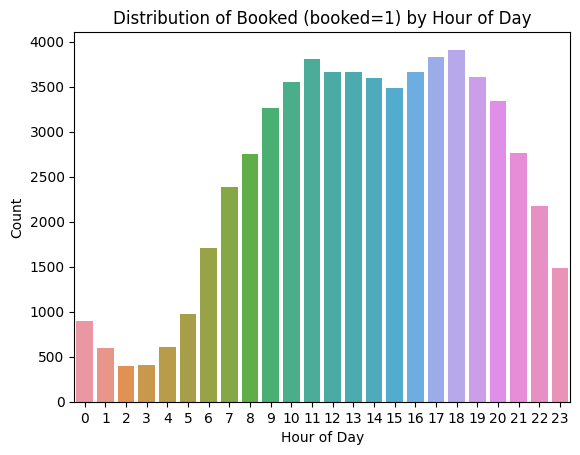

In [38]:
# Visualizing if hour of day has any impact on booking
# Creating a new DataFrame 'booked_df' that only contains rows where 'booked' is equal to 1
booked_df = df[df['booked'] == 1]  # Filter DataFrame for 'booked' == 1

# Creating a count plot to visualize the distribution of 'booked' (where 'booked' is 1) by 'hour_of_day'
sns.countplot(data=booked_df, x='hour_of_day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Distribution of Booked (booked=1) by Hour of Day')
plt.show()

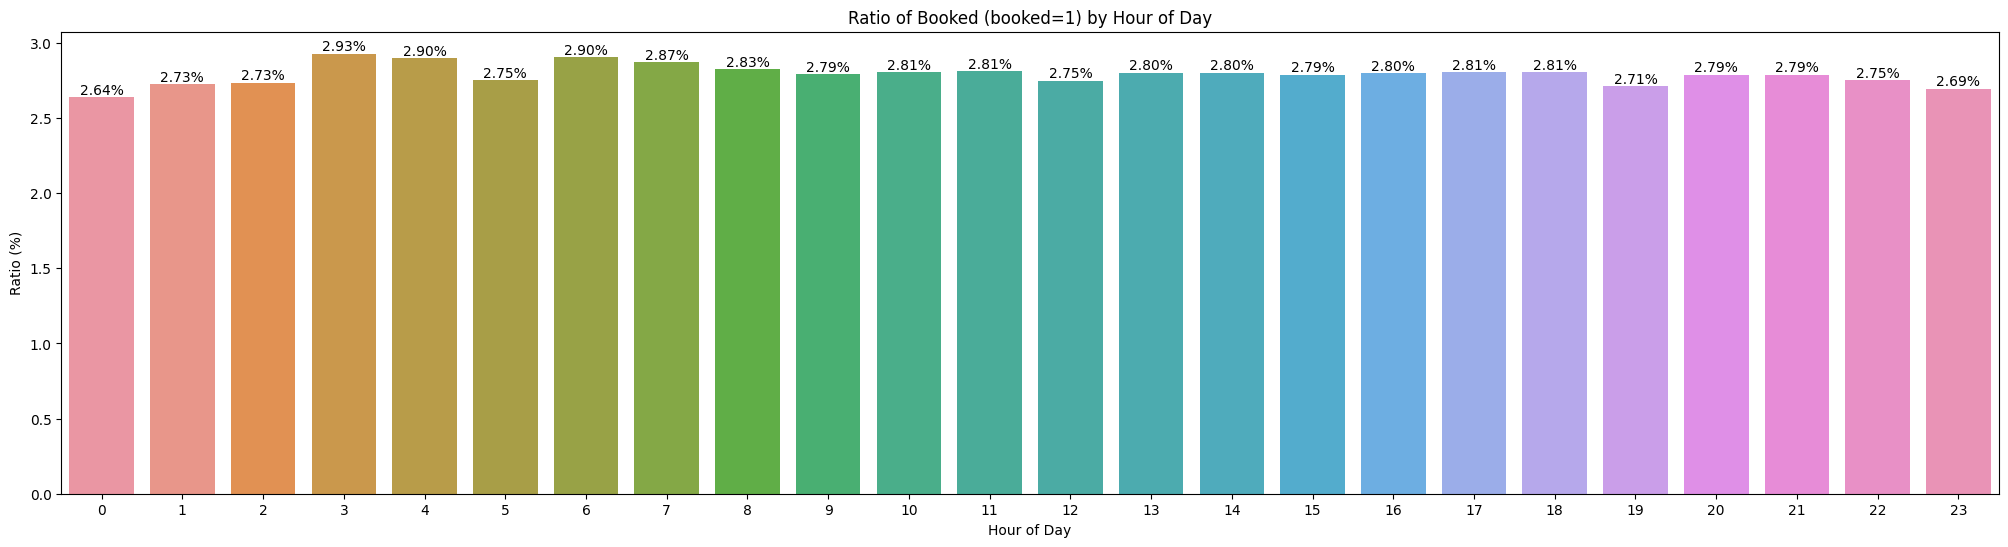

In [39]:
# The above plot shows that during ceratin hours of the day more booking are done
# However this could be simply beacuse of more people are use the website during those hours
# Normalizing this by diving booking by total views during each of these hours

# Calculating the value counts for 'hour_of_day' where 'booked' is equal to 1
booked_counts = df[df['booked'] == 1]['hour_of_day'].value_counts()

# Calculating the value counts for 'hour_of_day' in the entire DataFrame
total_counts = df['hour_of_day'].value_counts()

# Calculating the ratio of bookings by hour of the day
ratio = booked_counts / total_counts * 100

# Setting the figure size for the plot
plt.figure(figsize=(25, 6))  # Set the figure size

# Creating a bar plot to visualize the ratio of 'booked' (where 'booked' is 1) by 'hour_of_day'
sns.barplot(x=ratio.index, y=ratio.values)
plt.xlabel('Hour of Day')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Booked (booked=1) by Hour of Day')

# Adding data labels to the bar plot
for i, v in enumerate(ratio):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

**We can further statistically test if there is difference in booking rate during different hours of day**

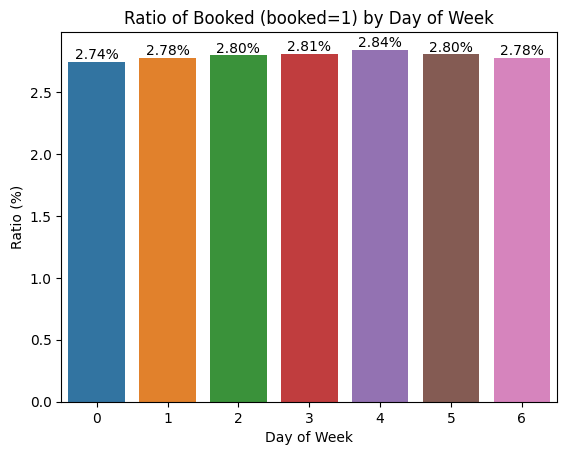

In [40]:
# Similarly Visualizing booking for different days of week, where 0 is Monday and 6 is Sunday
# Calculating the value counts for 'day_of_week' where 'booked' is equal to 1
booked_counts = df[df['booked'] == 1]['day_of_week'].value_counts()

# Calculating the value counts for 'day_of_week' in the entire DataFrame
total_counts = df['day_of_week'].value_counts()

# Calculating the ratio of bookings by day of the week
ratio = booked_counts / total_counts * 100


# Creating a bar plot to visualize the ratio of 'booked' (where 'booked' is 1) by 'day_of_week'
sns.barplot(x=ratio.index, y=ratio.values)
plt.xlabel('Day of Week')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Booked (booked=1) by Day of Week')

# Adding data labels to the bar plot
for i, v in enumerate(ratio):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

## 2. Which variables did you include in the initial model?

I intend to utilize Xgboost as my classification model since it has the capability to handle missing values. For my initial model, my intention is to incorporate all the features except for the following ones:

**search_id:** This variable is unique to each search, and since new searches will have new search IDs, it does not provide any useful information for our analysis.

**listing_position:** Since this information would not be available in the test data, it is not feasible to include it as a feature in our model.

**clicked:** This variable is closely related to the target variable, booked. Additionally, clicked is has been as an alternative choice for the target variable. Hence, including it as a feature might introduce redundancy or bias in our model.

**booking_value:** The booking_value is only available in cases where a booking occurs. Including this variable in the model could lead to target variable leakage, as it directly reflects the outcome we are trying to predict.

**timestamp:** Instead of timestamp, derived features 'day_of_week', 'hour_of_day' are being used.

By excluding these features from the model, we can avoid potential issues such as data leakage, redundancy, and the absence of necessary information in the test data.

In [41]:
X = df[['site_id', 'user_country_id', 
        'user_hist_stars', 'user_hist_paid', 'listing_country_id',
        'listing_id', 'listing_stars', 'listing_review_score',
        'is_brand', 'location_score1', 'location_score2',
        'log_historical_price', 'price_usd',
        'has_promotion', 'destination_id', 'length_of_stay',
        'booking_window', 'num_adults', 'num_kids',
        'num_rooms', 'stay_on_saturday', 'log_click_proportion',
        'distance_to_dest', 'random_sort', 'competitor1_rate',
        'competitor1_has_availability', 'competitor1_price_percent_diff',
        'competitor2_rate', 'competitor2_has_availability', 'competitor2_price_percent_diff',
        'competitor3_rate', 'competitor3_has_availability', 'competitor3_price_percent_diff',
        'competitor4_rate', 'competitor4_has_availability', 'competitor4_price_percent_diff',
        'competitor5_rate', 'competitor5_has_availability', 'competitor5_price_percent_diff',
        'competitor6_rate', 'competitor6_has_availability', 'competitor6_price_percent_diff',
        'competitor7_rate', 'competitor7_has_availability', 'competitor7_price_percent_diff',
        'competitor8_rate', 'competitor8_has_availability', 'competitor8_price_percent_diff',
        'day_of_week', 'hour_of_day']]


y = df['booked']

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168019 entries, 0 to 2168018
Data columns (total 50 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   site_id                         category
 1   user_country_id                 category
 2   user_hist_stars                 float64 
 3   user_hist_paid                  float64 
 4   listing_country_id              category
 5   listing_id                      category
 6   listing_stars                   int8    
 7   listing_review_score            float64 
 8   is_brand                        int8    
 9   location_score1                 float64 
 10  location_score2                 float64 
 11  log_historical_price            float64 
 12  price_usd                       float64 
 13  has_promotion                   int8    
 14  destination_id                  category
 15  length_of_stay                  int32   
 16  booking_window                  int32   
 17  num_adul

In [43]:
X.nunique()

site_id                               34
user_country_id                      191
user_hist_stars                      287
user_hist_paid                      4020
listing_country_id                   165
listing_id                        115583
listing_stars                          6
listing_review_score                  10
is_brand                               2
location_score1                      337
location_score2                     9045
log_historical_price                 379
price_usd                          61001
has_promotion                          2
destination_id                     12612
length_of_stay                        32
booking_window                       387
num_adults                             9
num_kids                              10
num_rooms                              8
stay_on_saturday                       2
log_click_proportion              107986
distance_to_dest                  368840
random_sort                            2
competitor1_rate

In [44]:
# Splitting the data into train, test and validation sets in the ratio 60%, 20% and 20%.
from sklearn.model_selection import train_test_split

# Split data into train and remaining data (60% train, 40% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Split remaining data into test and validation (50% test, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, stratify=y_remaining, random_state=42)

## 3.	Which transformations/preprocesses did you apply? Why did you apply those transformations? What would have happened if you didn't apply those techniques?

* I applied target encoding to categorical variables in my dataset. Target encoding replaces each categorical value with the mean target value of the corresponding category. This transformation helps capture the relationship between categorical variables and the target variable. By replacing categorical values with the mean target value of the corresponding category, the model can learn the target variable's behaviour within each category, which can be useful in predictive modelling.
* I also applied normalization using StandardScaler to scale the numeric variables in the dataset. This technique standardizes the numeric features by subtracting the mean and dividing by the standard deviation. This prevents any feature from having a disproportionate influence on the model's learning process. It also helps in cases where certain algorithms assume data to be normally distributed or require features to have similar ranges.
* Most models require data to be numeric, applying target encoding to categorical variables ensures that. Just label encoding might lead the model to treat them as nominal values without considering the target variable's behaviour within each category. This could lead to a loss of important information and potentially result in suboptimal predictive performance.
* Without normalizing the numeric variables using StandardScaler, features with larger scales or variances could dominate the learning process. The model might give undue importance to those features, potentially leading to biased results. Normalization ensures that all features contribute equally to the model's learning process.
* By applying target encoding and normalization using StandardScaler, I aimed to capture important information from categorical variables and ensure equal importance of numeric variables in the predictive modelling process. These transformations help improve the model's performance and ensure fair treatment of different features, ultimately leading to more reliable and accurate predictions.

In [45]:
import category_encoders as ce

# Selecting all categorical columns using select_dtypes on X_train
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a target encoder object
target_encoder = ce.TargetEncoder(cols=categorical_cols)

# Fit the target encoder on X_train
target_encoder.fit(X_train[categorical_cols], y_train)

# Transform X_train, X_val, and X_test using the fitted encoder
X_train_encoded = target_encoder.transform(X_train[categorical_cols])
X_val_encoded = target_encoder.transform(X_val[categorical_cols])
X_test_encoded = target_encoder.transform(X_test[categorical_cols])

# Concatenate the encoded features with the original sets
X_train_encoded = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_val_encoded = pd.concat([X_val.drop(columns=categorical_cols), X_val_encoded], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)

In [46]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300811 entries, 1516817 to 854974
Data columns (total 50 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_hist_stars                 67173 non-null    float64
 1   user_hist_paid                  67561 non-null    float64
 2   listing_stars                   1300811 non-null  int8   
 3   listing_review_score            1298891 non-null  float64
 4   is_brand                        1300811 non-null  int8   
 5   location_score1                 1300811 non-null  float64
 6   location_score2                 1012954 non-null  float64
 7   log_historical_price            1300811 non-null  float64
 8   price_usd                       1300811 non-null  float64
 9   has_promotion                   1300811 non-null  int8   
 10  length_of_stay                  1300811 non-null  int32  
 11  booking_window                  1300811 non-null  int32  


In [47]:
# Scaling numeric features except those which have just Boolean values
from sklearn.preprocessing import StandardScaler

# Select all numeric columns
numeric_cols = X_train.select_dtypes(include=['int8', 'int32', 'int64', 'float64']).columns.tolist()

# Exclude numeric columns with values of just 0 and 1
exclude_cols = ['stay_on_saturday', 'random_sort', 'is_brand', 'has_promotion']  # column names to exclude

# Remove the excluded columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on X_train's numeric columns
scaler.fit(X_train_encoded[numeric_cols])

# Transform X_train, X_val, and X_test using the fitted scaler
X_train_scaled = X_train_encoded.copy()
X_val_scaled = X_val_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

## 4.	Which machine learning technique did you choose? Why?
I chose the XGBoost machine learning technique for several reasons:

* **Handling null values:** XGBoost is capable of handling null values inherently. Since many features in the dataset had null values, using XGBoost allowed us to train the model without requiring imputation or dropping those features.
* **Dealing with many features:** XGBoost is known for its effectiveness in handling datasets with a large number of features. Given that our dataset had a significant number of features, XGBoost provided a suitable approach for modelling the data efficiently.
* **Performance on tabular data:** XGBoost has demonstrated excellent performance on tabular data in various machine learning competitions and real-world applications. Its ability to capture complex relationships and interactions among features made it a suitable choice for our task.
* **High predictive power:** XGBoost is known for its high predictive power and has been shown to achieve state-of-the-art results in various machine learning tasks. By leveraging gradient boosting and ensemble techniques, XGBoost combines the strengths of multiple weak learners to create a strong predictive model.\
Considering these factors, I decided to use XGBoost as the machine learning technique for this task. Its ability to handle null values, efficient handling of high-dimensional tabular data, robustness to overfitting, and strong predictive power made it a suitable choice for achieving accurate and reliable predictions on our dataset.


In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=49,  # Set the scale_pos_weight based on class imbalance ratio
    tree_method='hist'   
)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.72
Precision: 0.05
Recall: 0.52
F1-score: 0.09


## 5.	Which evaluation metric did you use to optimize the machine learning model? Why did you choose it? What are the implications of the final metric value?
* I chose recall as the primary evaluation metric and F1-score as the secondary metric to optimize the machine learning model. The data had a heavy class imbalance with very few positive instances, so maximizing the positive class was important. The final metric values of recall: 0.52 and F1-score: 0.09 indicate that the model has relatively low performance in correctly identifying positive instances. This suggests a trade-off between precision and recall, with the model struggling to achieve both simultaneously. The low F1-score highlights the challenges in balancing false positives and false negatives. To improve performance, techniques like up sampling, adjusting class weights, or using algorithms specifically designed for imbalanced data could be explored.


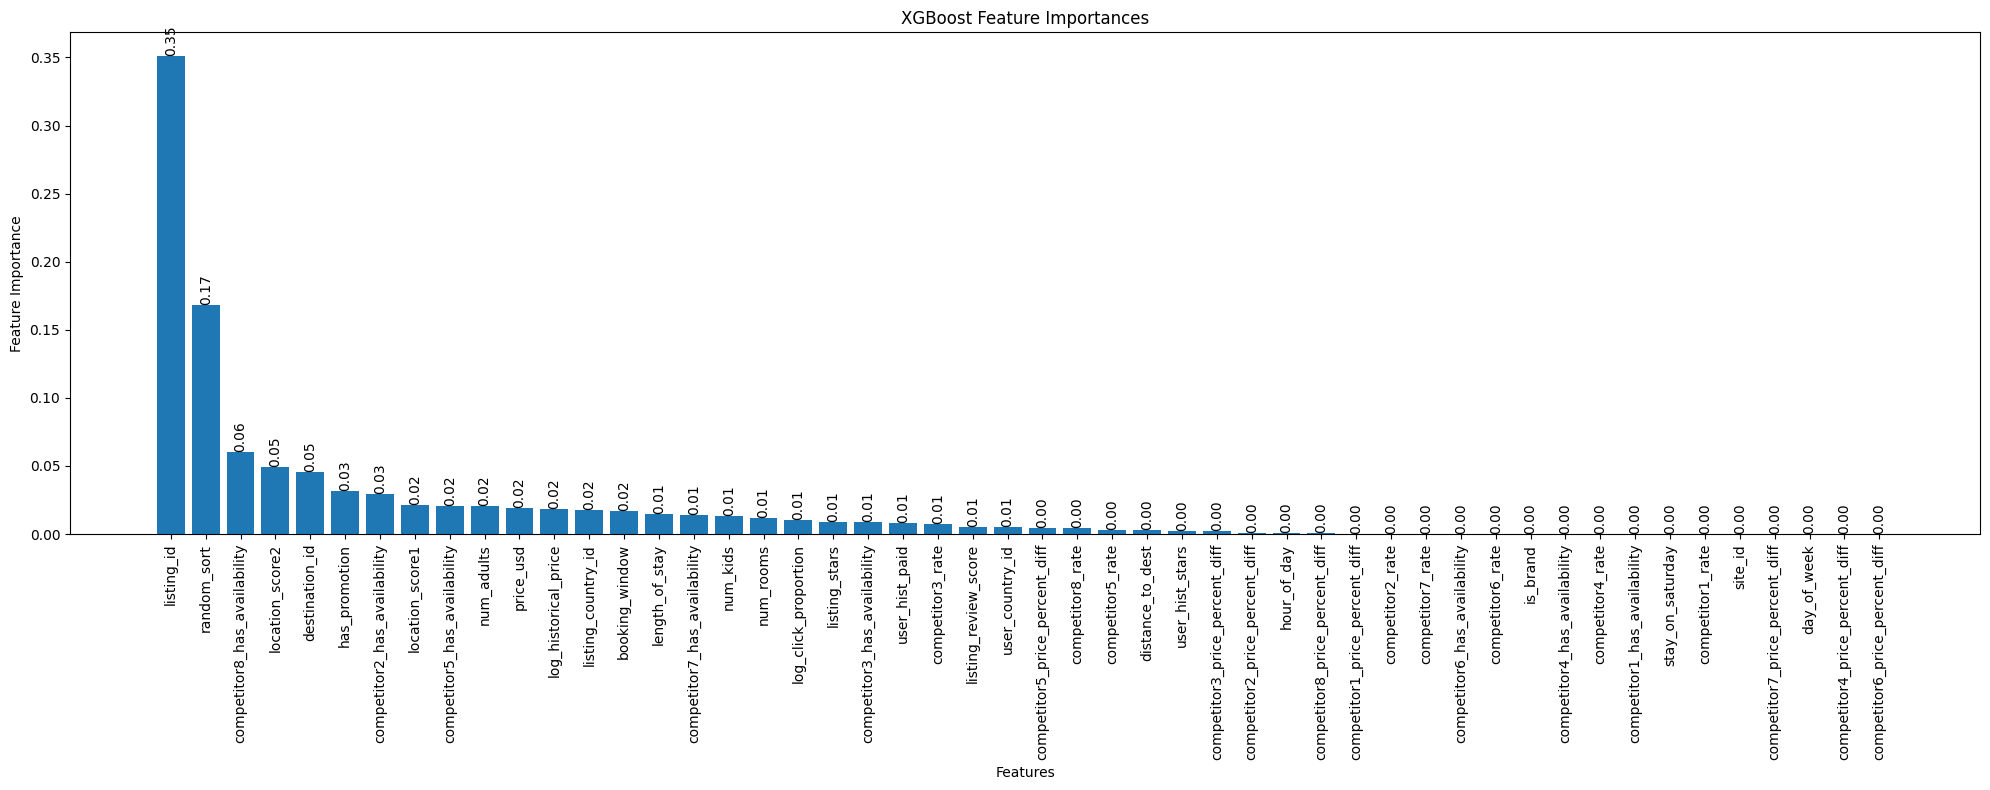

listing_id: 0.35086318850517273
random_sort: 0.16793467104434967
competitor8_has_availability: 0.060498569160699844
location_score2: 0.04894661903381348
destination_id: 0.04565035179257393
has_promotion: 0.031709469854831696
competitor2_has_availability: 0.029374588280916214
location_score1: 0.021196765825152397
competitor5_has_availability: 0.02066802978515625
num_adults: 0.02047175168991089
price_usd: 0.018935129046440125
log_historical_price: 0.01855854131281376
listing_country_id: 0.01736520603299141
booking_window: 0.016948385164141655
length_of_stay: 0.01454236265271902
competitor7_has_availability: 0.014029394835233688
num_kids: 0.01321337465196848
num_rooms: 0.012020934373140335
log_click_proportion: 0.010197814553976059
listing_stars: 0.009004322811961174
competitor3_has_availability: 0.008979381993412971
user_hist_paid: 0.007852582260966301
competitor3_rate: 0.007248552516102791
listing_review_score: 0.005490943789482117
user_country_id: 0.005263681057840586
competitor5_price

In [49]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot feature importances with rotated tick marks and vertical data labels
plt.figure(figsize=(20, 8))
bars = plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

# Rotate the tick marks on the x-axis
plt.xticks(rotation=90)

plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

# Print feature importances
for feature, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{feature}: {importance}")

In [50]:
# Get the top 25 feature names and importances
top_feature_names = sorted_feature_names[:25]

# Select only the top 25 features in X_train_scaled
X_train_top25 = X_train_scaled[top_feature_names]

# Select only the top 25 features in X_val_scaled
X_val_top25 = X_val_scaled[top_feature_names]

# Select only the top 25 features in X_test_scaled
X_test_top25 = X_test_scaled[top_feature_names]

In [51]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'scale_pos_weight': [25, 49, 100]
# }

# # Create XGBoost classifier
# model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     random_state=42,
#     tree_method='hist'
# )

# # Define the scoring metrics (recall and F1-score)
# scoring = {
#     'Recall': make_scorer(recall_score),
#     'F1': make_scorer(f1_score)
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scoring, refit='F1', cv=5)
# grid_search.fit(X_train_top25, y_train)

# # Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred = best_model.predict(X_test_top25)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Print the evaluation metrics
# print("Accuracy: {:.2f}".format(accuracy))
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))
# print("F1-score: {:.2f}".format(f1))

In [52]:
# # Print the best model and its parameters
# print("Best model: ", best_model)
# print("Best model parameters: ", best_model.get_params())

In [53]:
# import pickle

# # Save the best model
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

# # Save the best parameters
# with open('best_params.pkl', 'wb') as f:
#     pickle.dump(best_params, f)

In [54]:
# Alternative we can also UpSampling minority class
# Upsampling the minority class using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Create an instance of the RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.50, random_state = 42)  # Setting the ratio of minority class samples to 50% of total samples

# Resample the minority class in X_train_top25 and y_train
X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train_top25, y_train)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'tree_method': ['approx','hist']
}

# Create XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

# Define the scoring metrics (recall and F1-score)
scoring = {
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scoring, refit='F1', cv=5)
grid_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_top25)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.85
Precision: 0.07
Recall: 0.36
F1-score: 0.12


In [56]:
# Print the best model and its parameters
print("Best model: ", best_model)
print("Best model parameters: ", best_model.get_params())

Best model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Best model parameters:  {'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds

In [57]:
# Make predictions on the validation data using the best model
y_pred_val = best_model.predict(X_val_top25)

# Calculate the accuracy of the best model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)

# Calculate the precision of the best model on the validation data
precision_val = precision_score(y_val, y_pred_val)

# Calculate the recall of the best model on the validation data
recall_val = recall_score(y_val, y_pred_val)

# Calculate the F1-score of the best model on the validation data
f1_val = f1_score(y_val, y_pred_val)

# Print the accuracy score on the validation data
print("Accuracy on validation data: {:.2f}".format(accuracy_val))
print("Precision on validation data: {:.2f}".format(precision_val))
print("Recall on validation data: {:.2f}".format(recall_val))
print("F1-score on validation data: {:.2f}".format(f1_val))

Accuracy on validation data: 0.85
Precision on validation data: 0.07
Recall on validation data: 0.37
F1-score on validation data: 0.12


## 6.	How would you interpret this model? If the model is too complex to be directly interpreted, how would you approach this problem?
XGBoost is an ensemble method that combines multiple decision trees to create a powerful predictive model. Each decision tree learns different patterns and contributes to the final prediction, making the model inherently complex. Additionally, the hyperparameter tuning process using grid search and cross-validation adds further complexity. The large parameter grid with multiple combinations of hyperparameters increases the search space, requiring extensive computation and evaluation to identify the best configuration.


However, there are approaches to gain insights and interpretability:\
**1. Feature Importance:** XGBoost provides a feature importance score, indicating the relative importance of each feature in the model's predictions. This helps understand which features have the most significant impact on the outcome.\
**2. Simplified Models:** Building simpler models, such as decision trees or rule-based models, based on the insights gained from the XGBoost model can provide a more interpretable representation while sacrificing some predictive performance.\
By combining these techniques, one can gain a better understanding of the model's behavior and insights into the important features driving its predictions. Although the direct interpretation of the XGBoost model may be challenging, leveraging these approaches can provide valuable insights and facilitate decision-making based on the model's outcomes.


In [58]:
# # Alternative we can also UpSampling minority class
# # Upsampling the minority class using RandomOverSampler
# from imblearn.over_sampling import RandomOverSampler

# # Create an instance of the RandomOverSampler
# ros = RandomOverSampler(sampling_strategy=0.50)  # Setting the ratio of minority class samples to 50% of total samples

# # Resample the minority class in X_train_top25 and y_train
# X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train_top25, y_train)

In [59]:
# # Defining the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'tree_method': ['exact', 'hist']
# }

# # Create XGBoost classifier
# model = xgb.XGBClassifier(
#     objective='binary:logistic',
#     random_state=42
# )

# # Define the scoring metrics (recall and F1-score)
# scoring = {
#     'Recall': make_scorer(recall_score),
#     'F1': make_scorer(f1_score)
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scoring, refit='F1', cv=5)
# grid_search.fit(X_train_upsampled, y_train_upsampled)

# # Get the best hyperparameters and model
# best_params_1 = grid_search.best_params_
# best_model_1 = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred = best_model_1.predict(X_test_top25)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Print the evaluation metrics
# print("Accuracy: {:.2f}".format(accuracy))
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))
# print("F1-score: {:.2f}".format(f1))